# Using OpenCV Library

In [1]:
# file paths
test1_img_path = 'test-images/img1.jpg'
test2_img_path = 'test-images/img2.jpg'
test3_img_path = 'test-images/img3.jpg'
model_path = 'haarcascade_frontalface_default.xml'

In [2]:
# load pretrained model
import cv2
classifier = cv2.CascadeClassifier(model_path)

In [3]:
# find faces in image
import matplotlib.pyplot as plt

def find_faces(image, scaleFactor=1.1, minNeighbors=3):
    pixels = cv2.imread(image)
    boxes = classifier.detectMultiScale(pixels, scaleFactor, minNeighbors)
    print('No of faces detected:', boxes.shape[0])

    for box in boxes:
        # get coordinates for boxes
        x, y, width, height = box
        x2, y2 = x + width, y + height
        # draw a rectangle over the pixels
        cv2.rectangle(pixels, (x, y), (x2, y2), (1,225,255), 1)

    # Plot photograph with face detection
    plt.figure(figsize=(16,8))
    plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)) # converting BGR to RGB for using matplotlib
    plt.axis('off')
    plt.show()

No of faces detected: 8


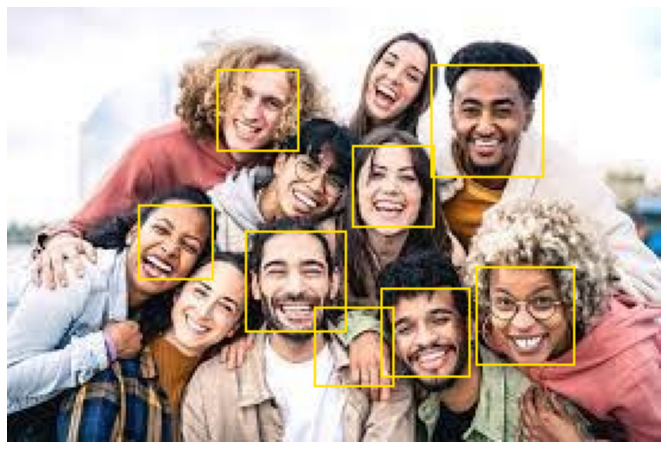

In [4]:
find_faces(test1_img_path, 1.03, 5)

No of faces detected: 1


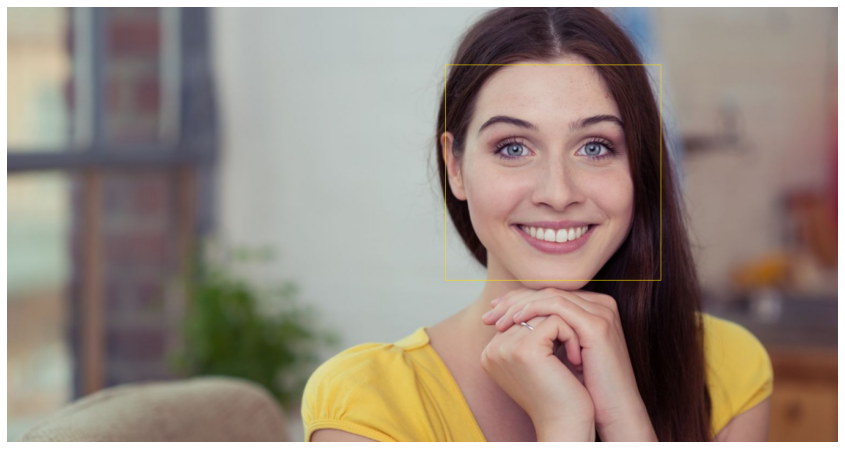

In [5]:
find_faces(test2_img_path)

No of faces detected: 2


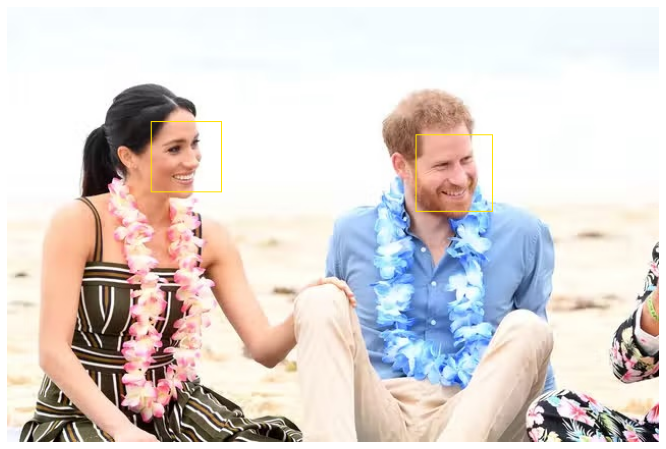

In [6]:
find_faces(test3_img_path, minNeighbors=4)

# Using MTCNN Library

In [7]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [8]:
from mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
plt.rcParams["figure.figsize"] = (16,8)

def find_face(filename):
    # load the image
    pixels = plt.imread(filename)
    # load the face detection model
    detector = MTCNN()
    # perform face detection
    faces = detector.detect_faces(pixels)
    print('No of faces detected:', len(faces))
    
    plt.imshow(pixels)
    ax = plt.gca()
    for face in faces:
        # get coordinates
        x, y, width, height = face['box']
        # create the rectangle
        rect = Rectangle((x, y), width, height, fill=False, color='yellow')
        # draw the box
        ax.add_patch(rect)
        # add dots for facial features
        for key, value in face['keypoints'].items():
            dot = Circle(value, radius=2, color='yellow')
            ax.add_patch(dot)

    # show the plot
    plt.plot()

2022-10-25 09:01:10.872399: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-25 09:01:11.208980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


No of faces detected: 10


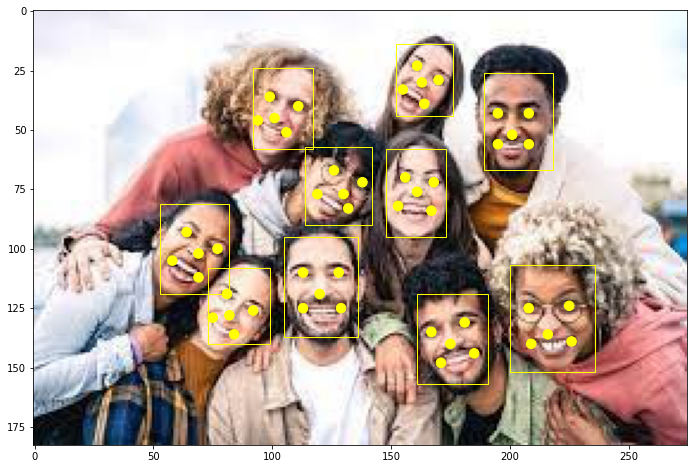

In [9]:
find_face(test1_img_path)

No of faces detected: 1


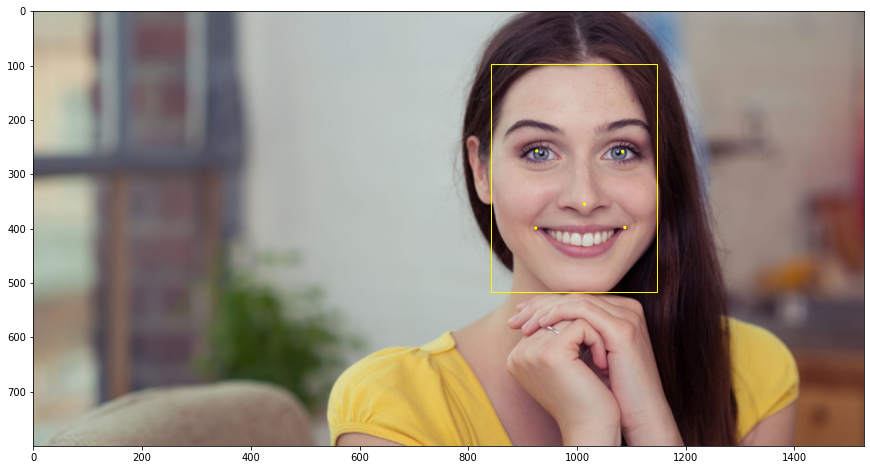

In [10]:
find_face(test2_img_path)

No of faces detected: 2


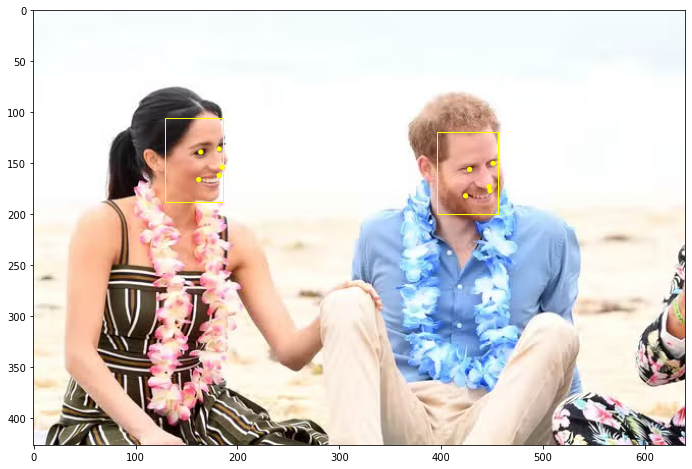

In [11]:
find_face(test3_img_path)

#### Separate Faces

In [12]:
def draw_faces_separately(filename):
    # load the image
    pixels = plt.imread(filename)
    # load the face detection model
    detector = MTCNN()
    # perform face detection
    faces = detector.detect_faces(pixels)
    print('No of faces detected:', len(faces))

    # plot each face as a subplot
    for i in range(len(faces)):
        # get coordinates
        x1, y1, width, height = faces[i]['box']
        x2, y2 = x1+width, y1+height
        # define the subplot
        plt.subplot(1, len(faces), i+1)
        plt.axis('off')
        # plot faces
        plt.imshow(pixels[y1:y2, x1:x2])
    
    # show the plot
    plt.plot()

No of faces detected: 10


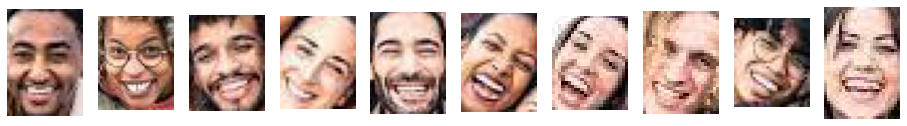

In [13]:
draw_faces_separately(test1_img_path)

No of faces detected: 1


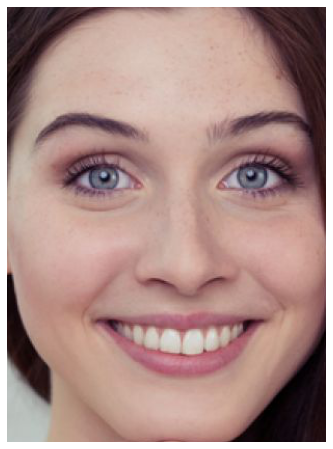

In [14]:
draw_faces_separately(test2_img_path)

No of faces detected: 2


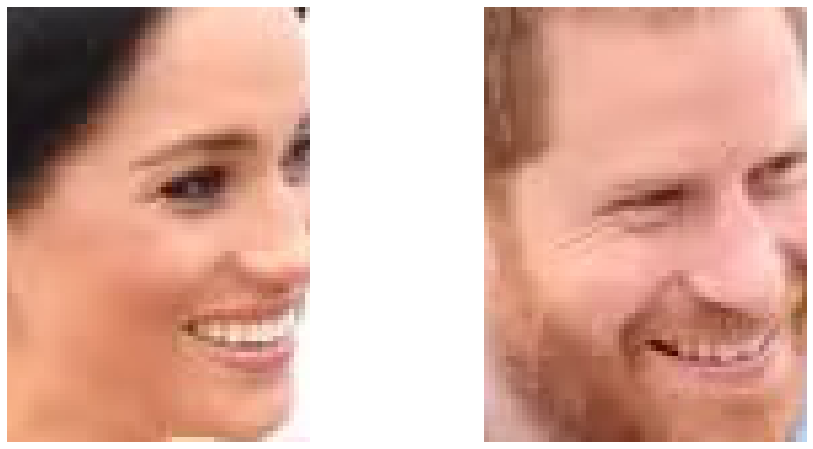

In [15]:
draw_faces_separately(test3_img_path)